In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def calculate_score(answers_path):
    with open('../../results/evaluation/answers.txt') as f:
        resps = pd.read_csv(answers_path)
        topsum_score_amazon = 0
        textsum_score_amazon = 0
        coop_score_amazon = 0
        topsum_score_yelp = 0
        textsum_score_yelp = 0
        coop_score_yelp = 0

        for question in range(1, len(resps.columns)):
            lines = list()
            for _ in range(5):
                lines.append(f.readline())
            for answer in resps[resps.columns[question]]:
                best_model = lines[int(re.findall(r"\d", answer)[0])][4:]
                if question < 7:
                    if best_model == 'TopSum\n':
                        topsum_score_amazon += 2
                    elif best_model == 'TextSum\n':
                        textsum_score_amazon += 2
                    else:
                        coop_score_amazon += 2

                    second_best_model = lines[int(re.findall(r"\d", answer)[1])][4:]
                    if second_best_model == 'TopSum\n':
                        topsum_score_amazon += 1
                    elif second_best_model == 'TextSum\n':
                        textsum_score_amazon += 1
                    else:
                        coop_score_amazon += 1
                else:
                    if best_model == 'TopSum\n':
                        topsum_score_yelp += 2
                    elif best_model == 'TextSum\n':
                        textsum_score_yelp += 2
                    else:
                        coop_score_yelp += 2

                    second_best_model = lines[int(re.findall(r"\d", answer)[1])][4:]
                    if second_best_model == 'TopSum\n':
                        topsum_score_yelp += 1
                    elif second_best_model == 'TextSum\n':
                        textsum_score_yelp += 1
                    else:
                        coop_score_yelp += 1
        f.close()
    return [topsum_score_amazon, textsum_score_amazon, coop_score_amazon, topsum_score_yelp, textsum_score_yelp, coop_score_yelp]


normal_scores = calculate_score('../../results/evaluation/Informativeness of Summaries.csv')
ss_scores = calculate_score('../../results/evaluation/Informativeness of Summaries SurveySwap.csv')


/tmp/ipykernel_84719/3035645761.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


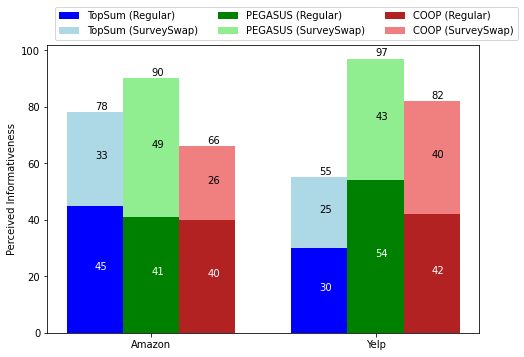

In [8]:
data = [30, 40, 35]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
colors = [['b', 'lightblue'], ['g', 'lightgreen'], ['firebrick', 'lightcoral']]
for i in range(2):
    for j in range(3):
        ax.bar(0.25*j+i, normal_scores[j+i*3], color = colors[j][0], width = 0.25)
        ax.text(0.25*j+i, (normal_scores[j+i*3])/2, normal_scores[j+i*3], color='white')
        ax.bar(0.25*j+i, ss_scores[j+i*3], bottom=normal_scores[j+i*3], color = colors[j][1], width = 0.25)
        ax.text(0.25*j+i, (ss_scores[j+i*3]/2)+normal_scores[j+i*3], ss_scores[j+i*3])
        ax.text(0.25*j+i, ss_scores[j+i*3]+normal_scores[j+i*3]+1, ss_scores[j+i*3]+normal_scores[j+i*3])
plt.xticks([r + 0.25 for r in range(2)], ['Amazon', 'Yelp'])
plt.ylabel('Perceived Informativeness')
plt.gcf().set_facecolor('white')
ax.legend(labels=['TopSum (Regular)', 'TopSum (SurveySwap)', 'PEGASUS (Regular)', 'PEGASUS (SurveySwap)', 'COOP (Regular)', 'COOP (SurveySwap)'], ncol=3, bbox_to_anchor=(1.1, 1.15))
plt.savefig('human_evaluation.png', bbox_inches='tight')
fig.show()